In [ ]:
import os
os.environ['USE_PYGEOS'] = '0'

import pandas as pd
pd.set_option('display.max_columns', None)

import geopandas as gpd

import matplotlib.pyplot as plt

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

file = np.random.normal(5,5,(1000,100))

for row in file:
    plt.clf() # Clear the current figure
    
    plt.plot(row) # Calculate and plot all you want

    plt.draw()
    plt.pause(0.1) # Has to pause for a non zero time

plt.show() # When all is done


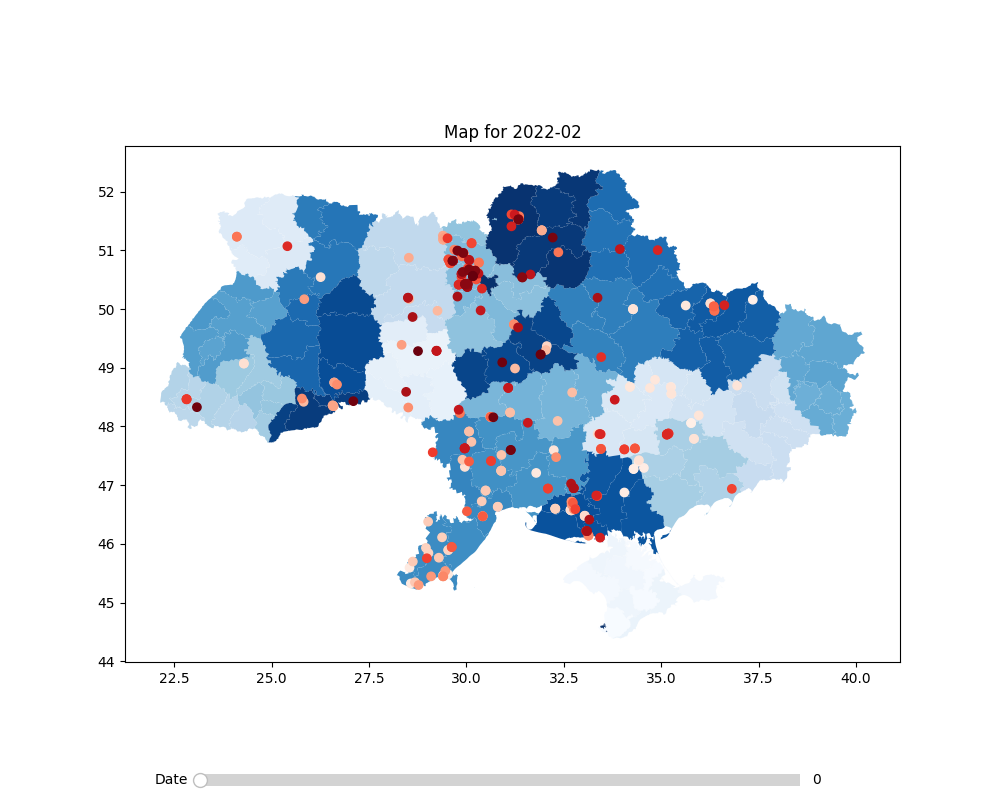

In [2]:
%matplotlib widget
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
import pandas as pd

# join gdf_ukraine_adm_2_firms_all_war year and month columns to a new column called date
gdf_ukraine_adm_2_firms_all_war['date'] = gdf_ukraine_adm_2_firms_all_war['year'].astype(str) + '-' + gdf_ukraine_adm_2_firms_all_war['month'].astype(str)

# Convert your date column to datetime format
gdf_ukraine_adm_2_firms_all_war['date'] = pd.to_datetime(gdf_ukraine_adm_2_firms_all_war['date'])

# Create a matplotlib figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Initial date
initial_date = gdf_ukraine_adm_2_firms_all_war['date'].min()

# Function to update the map based on the selected date
def update_map(val):
    ax.clear()
    
    # Calculate the selected date based on the fractional year from the slider
    selected_date = pd.to_datetime(val, format='%Y.%m')
    
    # Filter the GeoDataFrame based on the selected date
    filtered_gdf = gdf_ukraine_adm_2_firms_all_war[gdf_ukraine_adm_2_firms_all_war['date'].dt.year == selected_date.year]
    filtered_gdf = filtered_gdf[filtered_gdf['date'].dt.month == selected_date.month]
    
    # Plot the GeoDataFrame
    gdf_ukraine_adm_2.plot(ax=ax, cmap='OrRd', edgecolor="0.2", color='lightgrey')
    filtered_gdf.plot(ax=ax, column='fires_count', scheme='quantiles', cmap='OrRd', missing_kwds={'color': 'lightgrey'}, legend=True, legend_kwds={'loc': 'lower right'}, edgecolor="0.2")
    ax.set_axis_off()
    
    ax.set_title(f'Map for fires count in: {selected_date.strftime("%Y-%m")}')
    plt.draw()

# Create a slider
ax_slider = plt.axes([0.2, 0.01, 0.6, 0.03], facecolor='lightgoldenrodyellow')
slider_dates = pd.date_range(start=gdf_ukraine_adm_2_firms_all_war['date'].min(), end=gdf_ukraine_adm_2_firms_all_war['date'].max(), freq='M')
slider_labels = [date.strftime('%Y-%m') for date in slider_dates]
slider = Slider(ax_slider, 'Date', 0, len(slider_dates) - 1, valinit=0, valstep=1, valfmt='%0.0f', 
                orientation='horizontal')

# Attach the update_map function to the slider's on_changed event
slider.on_changed(lambda val: update_map(slider_dates[int(val)]))


# Initialize the map with the initial date
update_map(initial_date)